In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
#Load the dataset
data=pd.read_csv("CarPrice_Assignment (4).csv")
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
#Data Processing
#Dropping unnecessary columns and handling categorical variables
data=data.drop(['CarName','car_ID'], axis=1)
data=pd.get_dummies(data,drop_first=True)               

In [4]:
#Splitting the data into features and target variables
x=data.drop('price',axis=1)
y=data['price']

In [5]:
#Standardizing the data
scaler = StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(np.array(y).reshape(-1,1))




In [6]:
#Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
#Creating the SGD Regressor model
sgd_model=SGDRegressor(max_iter=1000,tol=1e-3)


In [8]:
#Fitting the model on the training data
sgd_model.fit(x_train,y_train)

C:\Users\balasurya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [9]:
#Making predictions
y_pred=sgd_model.predict(x_test)

In [10]:
#Evaluating model performance
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [11]:
#Print evaluation metrics
print('Name: Balasurya S')
print('Reg. No: 25000944')
print("Mean Squared Error:",mse)
print("R-squared Score:",r2)
print("Mean Absolute Error:",mae)

Name: Balasurya S
Reg. No: 25000944
Mean Squared Error: 0.21276308592928508
R-squared Score: 0.8288321752196486
Mean Absolute Error: 0.31990409306576184


In [12]:
#Print model coefficients
print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)



Model Coefficients:
Coefficients: [ 0.03644113  0.10467079  0.00530043  0.18101578  0.01731382  0.17996764
  0.29746911 -0.01919133 -0.08772226 -0.00114337  0.10775046  0.03823239
 -0.0408296  -0.05116344 -0.01946325  0.02245876  0.0179501  -0.01866822
 -0.08844477 -0.01524452 -0.09405658 -0.02981943  0.06565885  0.21234125
  0.0128534  -0.10127127  0.07171542 -0.01823596 -0.00200752  0.01139981
 -0.03721764 -0.14683789 -0.07471277  0.00082891 -0.02786123  0.01139981
 -0.00380599 -0.01722504  0.01946325 -0.01940024 -0.03397326 -0.04286795
 -0.01691473]
Intercept: [-0.0118457]


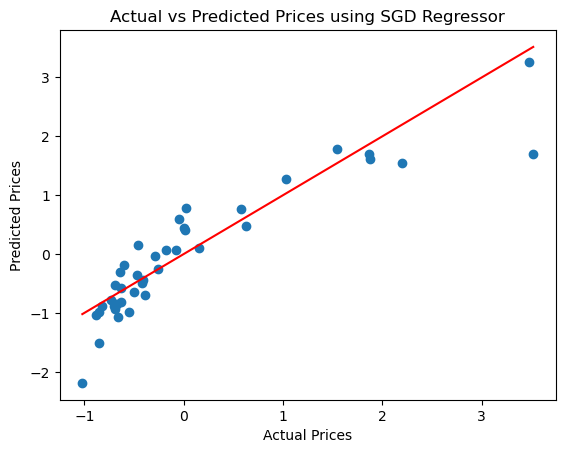

In [13]:
#Visualizing actual vs predicted prices
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red') #Perfect prediction line
plt.show()